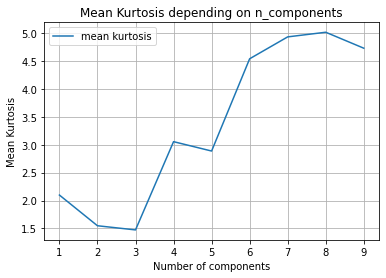

5.013832913403267
[ 8.46945153 15.96316489  1.57989083  4.3253553   1.74617661  2.25073999
  1.0015929   4.77429126]


C:\Users\Batuhan\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:116: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  warnings.warn(


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib.cm as cm
import itertools
from scipy import linalg
import matplotlib as mpl
from sklearn import mixture
from sklearn.decomposition import FastICA
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import kurtosis

#getting the data set
data=pd.read_csv('brain_stroke.csv',index_col=0)
data.head(-5)
#print(data)
#print(data.isna().sum())
#print(data.info())

# Importing LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Instantiating LabelEncoder
le=LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in data.columns.to_numpy():
    # Comparing if the dtype is object
    if data[col].dtypes in ('object','category'):
    # Using LabelEncoder to do the numeric transformation
        data[col]=le.fit_transform(data[col].astype(str))


#establishing the training set and the test set
X=data.drop(["stroke"],axis=1)
y=data["stroke"]

scaler = MinMaxScaler()
X= scaler.fit_transform(X)

#take number of features equal to number of components
kurtosis_list=[]
for n in range(1,10):
    ica = FastICA(n_components=n, random_state=42,max_iter=800).fit(X)
    X_red=ica.transform(X)
    #print(X_red)
    mean=np.mean(kurtosis(X_red, fisher=False))
    kurtosis_list.append(mean)
    
n=[k for k in range(1,10)]
fig, ax1=plt.subplots()
ax1.plot(n, kurtosis_list,label="mean kurtosis")
ax1.set_title('Mean Kurtosis depending on n_components')
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Mean Kurtosis')
ax1.legend()
ax1.grid()
plt.show()

#picking the n_components which maximize the mean given a threshold of 4.6
ica = FastICA(n_components=8, random_state=42,max_iter=300).fit(X)
X_red=ica.transform(X)
mean=np.mean(kurtosis(X_red, fisher=False))
print(mean)
print(kurtosis(X_red, fisher=False))

In [72]:
print(X_red)
X_red_new=np.array([X_red[:,0],X_red[:,1],X_red[:,3],X_red[:,7]])
X_red_new=np.transpose(X_red_new)
print(X_red_new)

[[-0.00889903 -0.05879075  0.00033509 ...  0.00629837  0.01385215
   0.03142109]
 [-0.00894837 -0.0583189   0.00800983 ... -0.00026124 -0.0145524
  -0.00626361]
 [-0.00468755  0.00325276  0.00408967 ... -0.00351345  0.01399893
   0.02289346]
 ...
 [ 0.04340159  0.00494272 -0.00020729 ...  0.01424478 -0.01396588
  -0.0132395 ]
 [-0.00477776  0.00370031  0.00777345 ... -0.00501379 -0.01428212
  -0.00603223]
 [ 0.04405384  0.00449196  0.00802067 ... -0.00230905  0.01395112
  -0.0130089 ]]
[[-0.00889903 -0.05879075  0.00936388  0.03142109]
 [-0.00894837 -0.0583189  -0.01025453 -0.00626361]
 [-0.00468755  0.00325276  0.01014393  0.02289346]
 ...
 [ 0.04340159  0.00494272  0.02047231 -0.0132395 ]
 [-0.00477776  0.00370031  0.01227554 -0.00603223]
 [ 0.04405384  0.00449196 -0.01588717 -0.0130089 ]]
